In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, TimeDistributed
import nltk
from nltk.corpus import treebank

# Download dataset
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [2]:
# Load dataset
sentences = treebank.tagged_sents()  # Each sentence has (word, tag) pairs

# Display few examples
print(f"Total sentences in dataset: {len(sentences)}")
print("Example sentence (word, tag):\n", sentences[0])


Total sentences in dataset: 3914
Example sentence (word, tag):
 [('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [3]:
# Prepare words and tags

# Separate words and tags
sentences_words = [[word for word, tag in sent] for sent in sentences]
sentences_tags = [[tag for word, tag in sent] for sent in sentences]

# Create vocabulary of words and tags
words = list(set([w for sent in sentences_words for w in sent]))
tags = list(set([t for sent in sentences_tags for t in sent]))

# Create mapping dictionaries
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["PAD"] = 0
word2idx["UNK"] = 1
idx2word = {i: w for w, i in word2idx.items()}

tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: t for t, i in tag2idx.items()}

print(f"Unique words: {len(words)}")
print(f"Unique tags: {len(tags)}")


Unique words: 12408
Unique tags: 46


In [4]:
# Encode sentences as integer sequences

max_len = 50  # Max words per sentence

X = [[word2idx.get(w, 1) for w in s] for s in sentences_words]
X = pad_sequences(X, maxlen=max_len, padding="post", value=word2idx["PAD"])

y = [[tag2idx[t] for t in s] for s in sentences_tags]
y = pad_sequences(y, maxlen=max_len, padding="post", value=tag2idx["PAD"])

# Convert tags to one-hot encoding
y = [to_categorical(i, num_classes=len(tag2idx)) for i in y]

print("Sample encoded input sentence:\n", X[0])
print("\nSample encoded output tags:\n", y[0][0:10])


Sample encoded input sentence:
 [  662  4530 12362  4123  8716  9844 12362  7229 11582   203 10604 11532
  7651  6133 11381   207  7368  7360     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]

Sample encoded output tags:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [5]:
# Define BiLSTM Model

model = Sequential()
model.add(Embedding(input_dim=len(word2idx), output_dim=64, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2idx), activation="softmax")))

# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Training model
history = model.fit(
    X, np.array(y),
    batch_size=32,
    epochs=3,
    validation_split=0.1,
    verbose=1
)


Epoch 1/3
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 116ms/step - accuracy: 0.1266 - loss: 3.2834 - val_accuracy: 0.2613 - val_loss: 1.8442
Epoch 2/3
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.3024 - loss: 1.5718 - val_accuracy: 0.4172 - val_loss: 0.7679
Epoch 3/3
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.4446 - loss: 0.5880 - val_accuracy: 0.4518 - val_loss: 0.3949


In [7]:
#Test on a custom sentence

test_sentence = ["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]
test_X = pad_sequences([[word2idx.get(w, 1) for w in test_sentence]], maxlen=max_len, padding="post")

pred = model.predict(test_X)
pred_tags = [idx2tag[np.argmax(p)] for p in pred[0]]

print("\nPredicted POS Tags:")
for w, t in zip(test_sentence, pred_tags[:len(test_sentence)]):
    print(f"{w:10} --> {t}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Predicted POS Tags:
The        --> DT
quick      --> JJ
brown      --> NN
fox        --> NN
jumps      --> NNS
over       --> IN
the        --> DT
lazy       --> NN
dog        --> NN


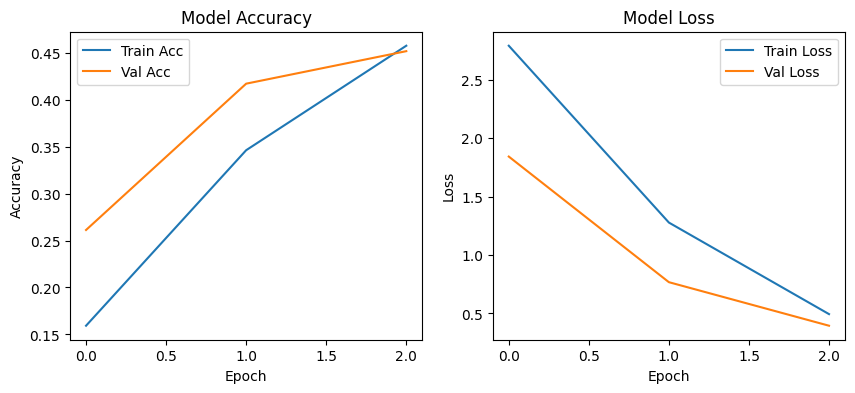

In [8]:
# Visualize training performance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
